In [1]:
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
from utilities.plotting import plot_imputations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

In [2]:
churn = pd.read_csv("../data/churn-modeling.csv", sep=',')
churn.sample(4)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2074,15805303,Olisanugo,661,Germany,Male,44,1,141136.62,1,Yes,No,189742.78,1
3523,15766746,Darwin,835,France,Male,35,6,127120.07,1,Yes,No,28707.69,0
4341,15665376,Lavrentiev,647,Germany,Female,35,3,166518.63,2,Yes,No,147930.46,0
3254,15778368,Allan,552,Germany,Male,50,4,121175.56,1,Yes,No,117505.07,1


## Datos missing

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        9980 non-null   object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  IsActiveMember   10000 non-null  object 
 11  EstimatedSalary  9988 non-null   float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1015.8+ KB


In [4]:
churn.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography          20
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    12
Exited              0
dtype: int64

<AxesSubplot:>

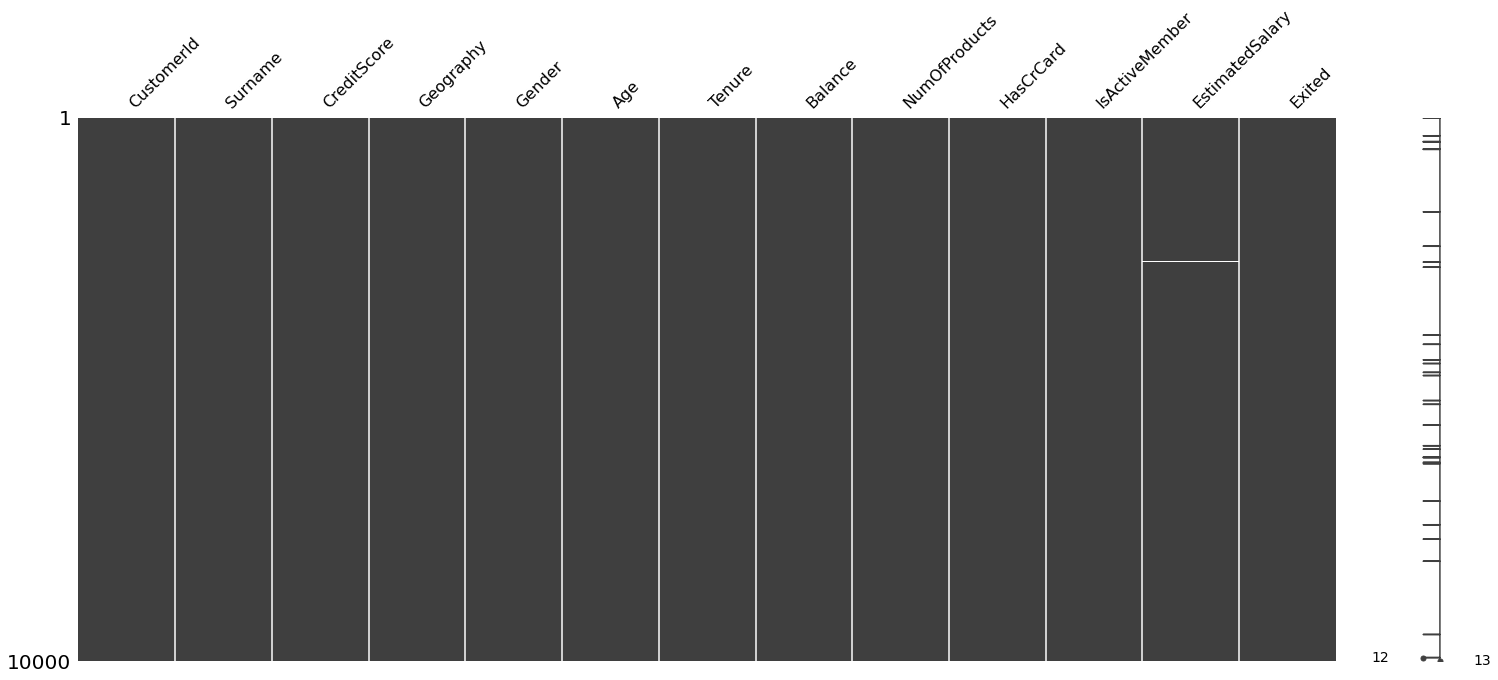

In [5]:
msno.matrix(df=churn)

<AxesSubplot:>

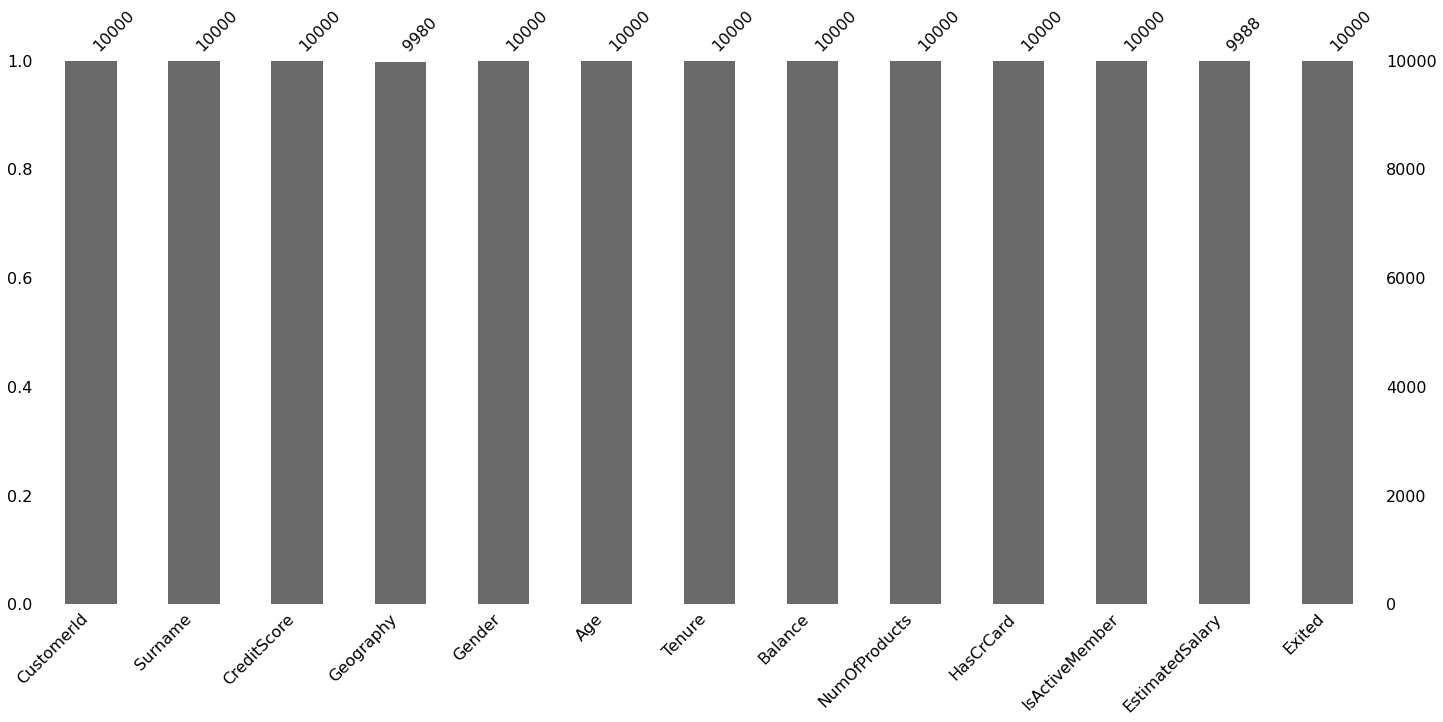

In [6]:
msno.bar(df=churn)

<AxesSubplot:>

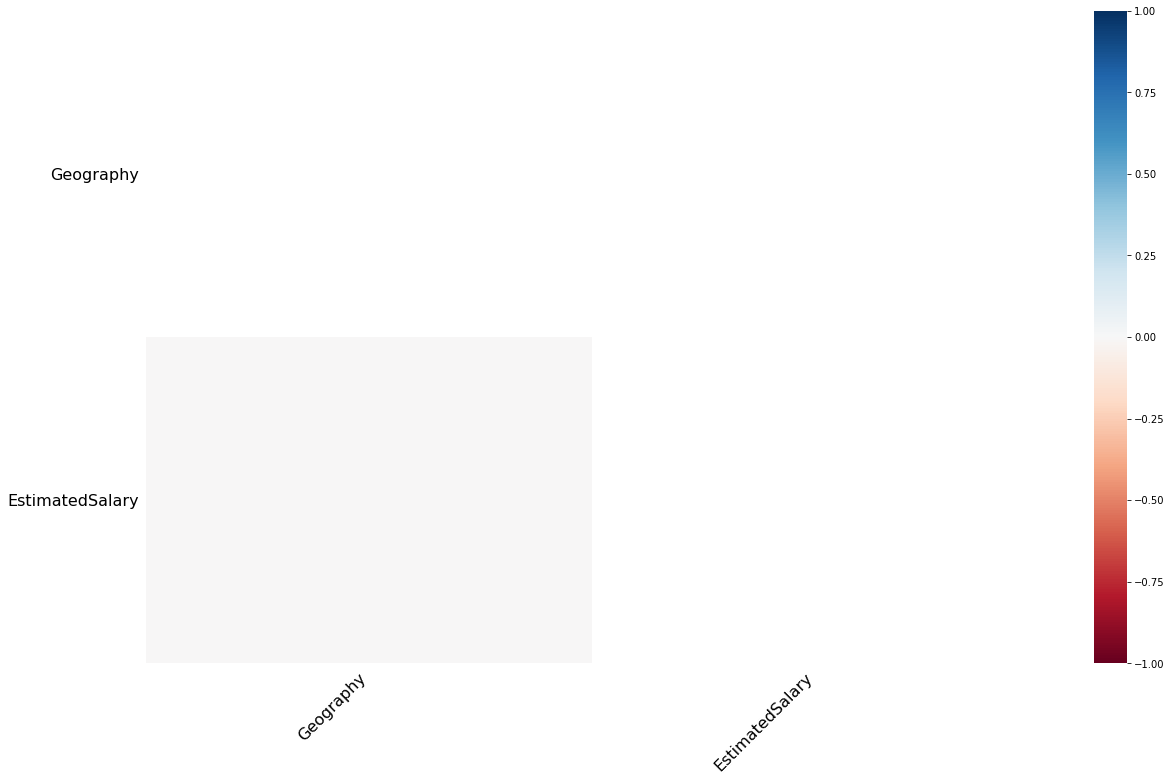

In [7]:
msno.heatmap(df=churn)

c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


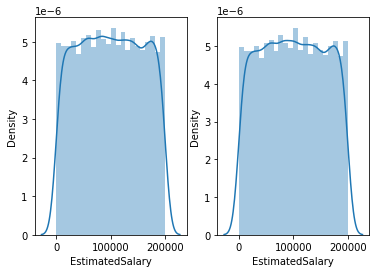

In [8]:
plot_imputations(df=churn, column='EstimatedSalary', method='median')

In [9]:
numerical_features = ['CreditScore', 'Age', 'EstimatedSalary']

categorical_features = ['Gender', 'IsActiveMember', 'HasCrCard']

In [10]:
churn = churn[numerical_features + categorical_features + ['Exited']]
churn.head()

,CreditScore,Age,EstimatedSalary,Gender,IsActiveMember,HasCrCard,Exited
0,619,42,101348.88,Female,Yes,Yes,1
1,608,41,112542.58,Female,Yes,No,0
2,502,42,113931.57,Female,No,Yes,1
3,699,39,93826.63,Female,No,No,0
4,850,43,79084.10,Female,Yes,Yes,0


## Partimos en train y test

In [11]:
exited = churn.pop('Exited')

churn.head()

,CreditScore,Age,EstimatedSalary,Gender,IsActiveMember,HasCrCard
0,619,42,101348.88,Female,Yes,Yes
1,608,41,112542.58,Female,Yes,No
2,502,42,113931.57,Female,No,Yes
3,699,39,93826.63,Female,No,No
4,850,43,79084.10,Female,Yes,Yes


In [12]:
exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [13]:
train_data, test_data, train_label, test_label = train_test_split(churn, exited,
                                                                  test_size=0.3, stratify=exited, random_state=42)

In [14]:
train_data.head()

,CreditScore,Age,EstimatedSalary,Gender,IsActiveMember,HasCrCard
9136,595,20,177738.98,Male,No,Yes
6410,689,63,186526.12,Female,Yes,Yes
2607,814,31,101704.19,Male,No,Yes
3201,722,20,195486.28,Male,No,Yes
3330,738,18,47799.15,Male,Yes,Yes


In [15]:
train_label.head()

9136    0
6410    0
2607    0
3201    0
3330    0
Name: Exited, dtype: int64

## Pre-procesamiento

In [16]:
imputer = SimpleImputer(strategy='median')

imputer.fit(train_data[numerical_features])

SimpleImputer(strategy='median')

In [17]:
imputer.statistics_


array([6.5200000e+02, 3.7000000e+01, 9.8710275e+04])

In [18]:
train_data[numerical_features] = imputer.transform(train_data[numerical_features])

<ipython-input-18-ae11402d067e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[numerical_features] = imputer.transform(train_data[numerical_features])
c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [19]:
test_data[numerical_features] = imputer.transform(test_data[numerical_features])

<ipython-input-19-6694789d7a18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[numerical_features] = imputer.transform(test_data[numerical_features])
c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [20]:
scaler = StandardScaler().fit(train_data[numerical_features])

In [21]:
print(f"La media en train es: {scaler.mean_}")
print(f"La sd en train es: {scaler.scale_}")

La media en train es: [6.50562429e+02 3.89984286e+01 9.94593494e+04]
La sd en train es: [9.65325605e+01 1.05741935e+01 5.74352503e+04]


In [22]:
train_data[numerical_features] = scaler.transform(train_data[numerical_features])

test_data[numerical_features] = scaler.transform(test_data[numerical_features])

<ipython-input-22-0dde0848873b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[numerical_features] = scaler.transform(train_data[numerical_features])
c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-22-0dde0848873b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

## Tratamiento sobre las variables categoricas

Encoding:

* pd.get_dummies()
* OneHotEncoder()

In [23]:
pd.get_dummies(data=train_data, columns=categorical_features)

,CreditScore,Age,EstimatedSalary,Gender_Female,Gender_Male,IsActiveMember_No,IsActiveMember_Yes,HasCrCard_No,HasCrCard_Yes
9136,-0.575582,-1.796679,1.362920,0,1,1,0,0,1
6410,0.398182,2.269825,1.515912,1,0,0,1,0,1
2607,1.693082,-0.756410,0.039085,0,1,1,0,0,1
3201,0.740036,-1.796679,1.671916,0,1,1,0,0,1
3330,0.905783,-1.985818,-0.899451,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1467,-0.275165,-0.378131,1.116536,1,0,1,0,0,1
4644,0.636444,3.310094,0.904784,0,1,1,0,1,0
8942,0.170280,-0.188991,-0.552353,1,0,0,1,0,1
2935,0.377464,-0.378131,-1.344333,0,1,1,0,0,1


In [24]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False).fit(train_data[categorical_features])

In [25]:
ohe.get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes'],
      dtype=object)

In [26]:
ohe_df = pd.DataFrame(ohe.transform(train_data[categorical_features]), columns=ohe.get_feature_names())
ohe_df

,x0_Female,x0_Male,x1_No,x1_Yes,x2_No,x2_Yes
0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
6995,1.0,0.0,1.0,0.0,0.0,1.0
6996,0.0,1.0,1.0,0.0,1.0,0.0
6997,1.0,0.0,0.0,1.0,0.0,1.0
6998,0.0,1.0,1.0,0.0,0.0,1.0


In [27]:
train_data.head()

,CreditScore,Age,EstimatedSalary,Gender,IsActiveMember,HasCrCard
9136,-0.575582,-1.796679,1.362920,Male,No,Yes
6410,0.398182,2.269825,1.515912,Female,Yes,Yes
2607,1.693082,-0.756410,0.039085,Male,No,Yes
3201,0.740036,-1.796679,1.671916,Male,No,Yes
3330,0.905783,-1.985818,-0.899451,Male,Yes,Yes


In [28]:
train_data.drop(labels=categorical_features, axis=1, inplace=True)

c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
train_data = pd.concat(objs=[train_data.reset_index(drop=True), ohe_df], axis=1)
train_data.head()

,CreditScore,Age,EstimatedSalary,x0_Female,x0_Male,x1_No,x1_Yes,x2_No,x2_Yes
0,-0.575582,-1.796679,1.362920,0.0,1.0,1.0,0.0,0.0,1.0
1,0.398182,2.269825,1.515912,1.0,0.0,0.0,1.0,0.0,1.0
2,1.693082,-0.756410,0.039085,0.0,1.0,1.0,0.0,0.0,1.0
3,0.740036,-1.796679,1.671916,0.0,1.0,1.0,0.0,0.0,1.0
4,0.905783,-1.985818,-0.899451,0.0,1.0,0.0,1.0,0.0,1.0
